In [105]:
#importing all the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve




import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

<h1>Step 1: Data Collection</h1>

* Load the Dataset

In [2]:
import pandas as pd
import numpy as np

# Read the leads.csv file
df = pd.read_csv('Files/leads.csv')


* Explore the Dataset

In [3]:
# Display the first few rows of the dataset
print(df.head())

# Check the number of rows and columns in the dataset
print("Shape of the dataset:", df.shape)

# Review the column names
print("Column names:", df.columns)

# Get summary information about the dataset
print(df.info())

# Calculate descriptive statistics for numeric variables
print(df.describe())


                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0 

* Identify the Target Variable

In [4]:
# "Converted" is the target variable
target_variable = 'Converted'

* Review Data Types

In [5]:
# Check the data types of each variable
print(df.dtypes)

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

* Assess Data Quality

In [6]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

<h1>Step 2 : Data Preprocessing</h1>


* Data Cleaning

identify columns with missing values

In [7]:
print(df.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Based on the missing value counts, we have several columns with missing values. To decide how to handle these missing values, it's important to understand the nature of the data and the context of each column.
Some common strategies for handling missing values include:
* Dropping columns with a high percentage of missing values.
* Dropping rows with missing values, especially if the number of missing values is relatively small compared to the total dataset size.
* Imputing missing values using methods such as mean, median, mode, or regression.

To drop columns with a high percentage of missing values, we can set a threshold value and drop the columns that have missing values exceeding that threshold. below code  that drops columns with missing values exceeding a threshold of 30%

In [8]:
threshold = 0.3  # Set the threshold to 30% missing values

# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean()

# Get the columns to drop based on the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop the columns from the DataFrame
df_dropped_columns = df.drop(columns=columns_to_drop)

# Print the updated DataFrame
print(df_dropped_columns.head())


                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0 

In [9]:
df = df.replace('Select',np.nan)

In [10]:
# check for percentage of null values in each column after dropping columns having more than 30 % null values

round(100*(df_dropped_columns.isnull().sum()/len(df_dropped_columns.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

The below columns still has high null values let's individually check and handle them
* Country   
* Specialization        
* How did you hear about X Education           
* What is your current occupation       
* What matters most to you in choosing a course    
* Lead Profile   
* City  

In [11]:
df_dropped_columns['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

* Country: maximum is from India so we can drop this column

In [12]:
df_dropped_columns = df_dropped_columns.drop('Country', axis=1)

* Specialization:
For the 'Specialization' column, we can replace missing values with the string "Not Specified" to indicate that the information was not provided.


In [13]:
df_dropped_columns['Specialization'] = df_dropped_columns['Specialization'].fillna('Not Specified')

In [14]:
df_dropped_columns['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

* How did you hear about X Education:
Similarly, for the 'How did you hear about X Education' column, we can drop as most of the values are select or not specified

In [15]:
df_dropped_columns = df_dropped_columns.drop('How did you hear about X Education', axis=1)

* What is your current occupation:
For the 'What is your current occupation' column, we can replace missing values with the mode (most frequent value) since it's a categorical variable.

In [16]:
df_dropped_columns['What is your current occupation'] = df_dropped_columns['What is your current occupation'].fillna('Unemployed')

* What matters most to you in choosing a course:
Since the 'What matters most to you in choosing a course' column has a high percentage of missing values, it might be better to drop this column.

In [17]:
df_dropped_columns.drop('What matters most to you in choosing a course', axis=1, inplace=True)

* Lead Profile:
For the 'Lead Profile' column, we can replace missing values with the string "Not Specified".

In [18]:
df_dropped_columns['Lead Profile'] = df_dropped_columns['Lead Profile'].fillna('Not Specified')

* City: For the 'City' column, we can replace missing values with the mode (most frequent value) since it's a categorical variable.

In [19]:
df_dropped_columns['City'] = df_dropped_columns['City'].fillna(df_dropped_columns['City'].mode()[0])


In [20]:
df_dropped_columns.drop(['Lead Number'], 1, inplace = True)
# too many unique values

In [21]:
#drop Prospect ID as its unique identifier
df_dropped_columns.drop(['Prospect ID'], 1, inplace = True)

In [22]:
#checking Null percentages
round(100*(df_dropped_columns.isnull().sum()/len(df_dropped_columns.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [23]:
#Now missing values are close to zero so we can drop them
df_dropped_columns.dropna(inplace = True)

In [24]:
#checking Null percentages
round(100*(df_dropped_columns.isnull().sum()/len(df_dropped_columns.index)), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [25]:
df.shape

(9240, 37)

In [26]:
df = df_dropped_columns

In [27]:
df.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
Lead Profile                      

In [28]:
def count_unique_values(dataframe):
    unique_counts = dataframe.nunique()
    unique_counts_df = pd.DataFrame({'Column': unique_counts.index, 'Unique Values': unique_counts.values})
    return unique_counts_df

def remove_columns_with_single_unique_value(dataframe):
    unique_counts_df = count_unique_values(dataframe)
    single_unique_columns = unique_counts_df[unique_counts_df['Unique Values'] == 1]['Column']
    updated_dataframe = dataframe.drop(single_unique_columns, axis=1)
    return updated_dataframe

updated_df = remove_columns_with_single_unique_value(df)

In [29]:
df= updated_df

In [30]:
df.nunique()

Lead Origin                                  4
Lead Source                                 21
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Last Activity                               17
Specialization                              20
What is your current occupation              6
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Lead Profile                                 7
City                                         7
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

<h1>Step 3 : Exploratory Data Analysis</h1>


* Univariate Analysis:

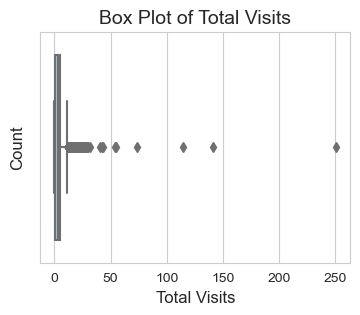

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")  # Set the style

plt.figure(figsize=(4, 3))  # Set the figure size

sns.boxplot(x=df['TotalVisits'], color='skyblue')  # Plot the box plot

plt.xlabel('Total Visits', fontsize=12)  # Set x-axis label
plt.ylabel('Count', fontsize=12)  # Set y-axis label
plt.title('Box Plot of Total Visits', fontsize=14)  # Set the plot title

plt.show()  # Show the plot


To remove outliers from the 'TotalVisits' column and plot the box plot again, we can use the concept of interquartile range (IQR) and set a threshold to identify and remove the outliers. 

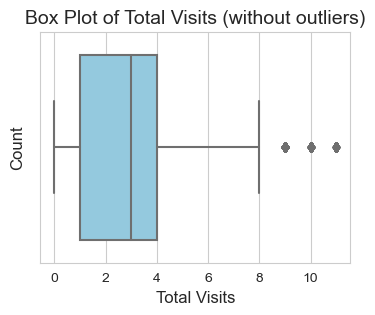

In [32]:

# Calculate the IQR
Q1 = df['TotalVisits'].quantile(0.25)
Q3 = df['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1

# Set the threshold to identify outliers
threshold = 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['TotalVisits'] >= Q1 - threshold) & (df['TotalVisits'] <= Q3 + threshold)]

# Plot the box plot without outliers
sns.set_style("whitegrid")
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_no_outliers['TotalVisits'], color='skyblue')
plt.xlabel('Total Visits', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Box Plot of Total Visits (without outliers)', fontsize=14)

plt.show()


The box ranges from approximately 1 to 4, indicating that the majority of the Total Visits values fall within this range.
The median, which is located at around 3, suggests that 50% of the Total Visits values are below this point and 50% are above.
The absence of outliers in the plot after removing them suggests that extreme or unusual values in Total Visits have been filtered out.

In [33]:
df = df_no_outliers

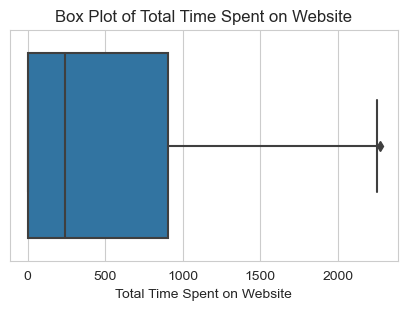

In [34]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.title('Box Plot of Total Time Spent on Website')
plt.show()

the box plot suggests that the majority of the values for 'Total Time Spent on Website' range from approximately 0 to 800, with the median value being around 250. This information provides insights into the distribution and central tendency of the variable.

Calculate measures such as mean, median, and standard deviation.

In [35]:
print('Mean:', df['Page Views Per Visit'].mean())
print('Median:', df['Page Views Per Visit'].median())
print('Standard Deviation:', df['Page Views Per Visit'].std())


Mean: 2.2832326558419442
Median: 2.0
Standard Deviation: 1.9605076778777346


* On average, visitors tend to view approximately 2.28 pages per visit.
* The median of 2.0 indicates that half of the visits have 2 or fewer page views, while the other half have more than 2 page views.
* The standard deviation of 1.96 suggests that there is a moderate amount of variability in the number of page views per visit. Some visits may have significantly fewer or more page views than the average.

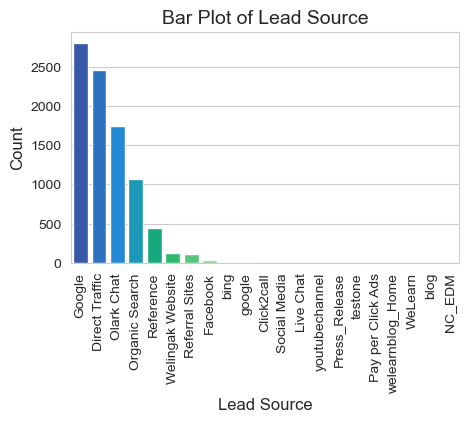

In [36]:
plt.figure(figsize=(5, 3))
sns.set_style("whitegrid")

# Reorder the categories based on count
order = df['Lead Source'].value_counts().index

sns.countplot(x='Lead Source', data=df, order=order, palette='terrain')
plt.xlabel('Lead Source', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Bar Plot of Lead Source', fontsize=14)
plt.xticks(rotation=90)
plt.show()


We can observe most of the traffic coming from Google or direct

We notice there are two spelling of google and all the other values have very low count so we can put that as others

In [37]:
df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

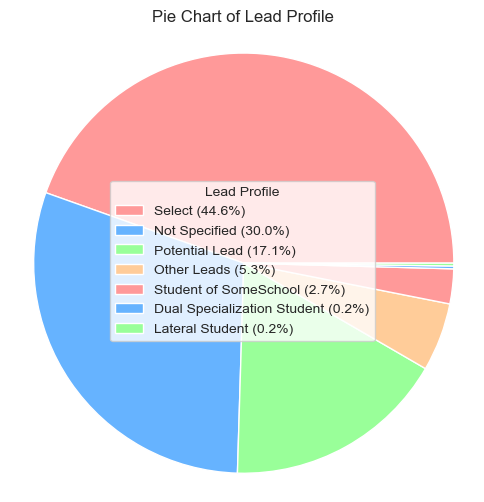

In [38]:
plt.figure(figsize=(6, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Plot the pie chart without percentages
patches, _ = plt.pie(df['Lead Profile'].value_counts(), colors=colors)
plt.axis('equal')

# Add the percentages inside the legends
labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(df['Lead Profile'].value_counts().index, df['Lead Profile'].value_counts(normalize=True) * 100)]
plt.legend(patches, labels, title='Lead Profile', loc='center')

plt.title('Pie Chart of Lead Profile')
plt.show()


The majority of leads have a profile labeled as "Select," indicating incomplete information. "Potential Lead" is the second most common profile, suggesting further nurturing is required. Other profiles, such as "Student of SomeSchool," "Lateral Student," and "Dual Specialization Student," represent smaller segments that may require tailored marketing approaches.

In [39]:
print(df['City'].value_counts())
print(df['City'].value_counts(normalize=True) * 100)


Mumbai                         4445
Select                         2131
Thane & Outskirts               708
Other Cities                    657
Other Cities of Maharashtra     435
Other Metro Cities              359
Tier II Cities                   72
Name: City, dtype: int64
Mumbai                         50.471216
Select                         24.196662
Thane & Outskirts               8.039060
Other Cities                    7.459975
Other Cities of Maharashtra     4.939253
Other Metro Cities              4.076303
Tier II Cities                  0.817532
Name: City, dtype: float64


The majority of leads are from Mumbai, followed by a significant number of leads with the "Select" city label, indicating incomplete information. Thane & Outskirts, Other Cities, and Other Cities of Maharashtra also contribute to the lead count. Other Metro Cities and Tier II Cities have relatively smaller representation. It suggests a potential focus on targeting leads from Mumbai and further improving the quality and completeness of city information in the dataset.

* Bi variate Analysis:

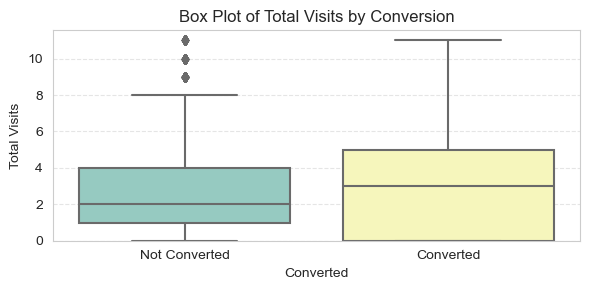

In [40]:
plt.figure(figsize=(6, 3))
sns.boxplot(y='TotalVisits', x='Converted', data=df_no_outliers, palette='Set3')
plt.title('Box Plot of Total Visits by Conversion')
plt.xlabel('Converted')
plt.ylabel('Total Visits')
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.ylim(bottom=0)  # Set the lower limit of the y-axis to 0
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add horizontal grid lines
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


the median of the 'Converted' group is slightly higher than the 'Not Converted' group, it suggests that on average, the 'TotalVisits' tends to be slightly higher for the converted leads compared to the non-converted leads.

The vertical extent of the box indicates the range of values where the majority of the data points lie. For the 'Converted' group, the box extends from approximately 0 to 4.5, while for the 'Not Converted' group, the box extends from approximately 1 to 4. This means that the range of 'TotalVisits' values for the converted leads is slightly wider than the range for the non-converted leads.

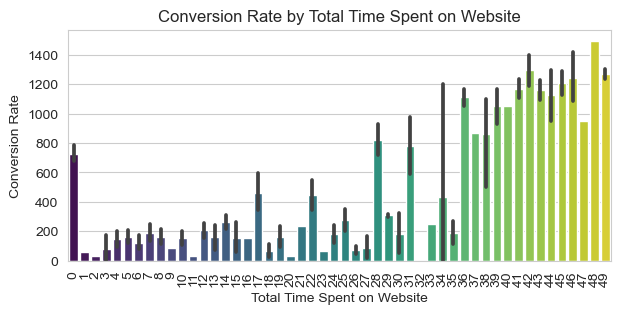

In [41]:
# Group the data by total time spent and calculate the average conversion rate
conversion_rate_by_time = df.groupby('Total Time Spent on Website')['Converted'].mean().reset_index()

# Sort the data by total time spent in ascending order
conversion_rate_by_time = conversion_rate_by_time.sort_values('Total Time Spent on Website')

plt.figure(figsize=(7, 3))
sns.barplot(y='Total Time Spent on Website', x='Converted', data=conversion_rate_by_time, palette='viridis')
plt.xlabel('Total Time Spent on Website')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Total Time Spent on Website')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.show()


we can observe the conversion rate increases significanltly for the users who spends more time on the website

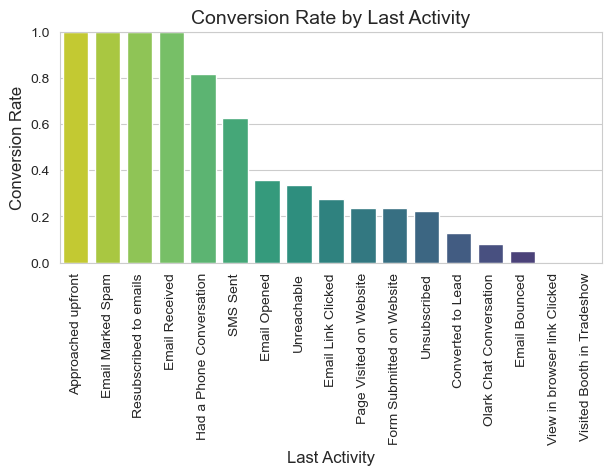

In [42]:
# Calculate the conversion rate by last activity
conversion_rate_last_activity = df.groupby('Last Activity')['Converted'].mean().reset_index()

# Sort the dataframe by conversion rate in descending order
conversion_rate_last_activity = conversion_rate_last_activity.sort_values('Converted', ascending=False)

# Plot the conversion rate by last activity
plt.figure(figsize=(7, 3))
sns.barplot(x='Last Activity', y='Converted', data=conversion_rate_last_activity, palette='viridis_r')
plt.xlabel('Last Activity', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.title('Conversion Rate by Last Activity', fontsize=14)
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.show()


The higher conversion rate for activities like "Approached upfront," "Email Marked Spam," "Resubscribed to emails," and "Emails Received" suggests that these activities have a positive impact on the likelihood of conversion. It indicates that leads who engage in these activities are more likely to be converted into customers. 

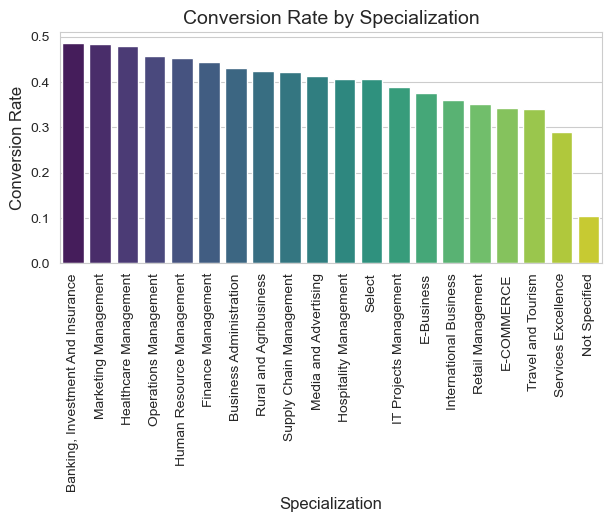

In [43]:
# Calculate the conversion rate by specialization
conversion_rate_by_specialization = df.groupby('Specialization')['Converted'].mean().sort_values(ascending=False)

# Plot the conversion rate by specialization
plt.figure(figsize=(7, 3))
sns.barplot(x=conversion_rate_by_specialization.index, y=conversion_rate_by_specialization.values, palette='viridis')
plt.xlabel('Specialization', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.title('Conversion Rate by Specialization', fontsize=14)
plt.xticks(rotation=90)
plt.show()


We can see that most of the specialization has >30% conversion rate while some has as high as 50% conversion rate

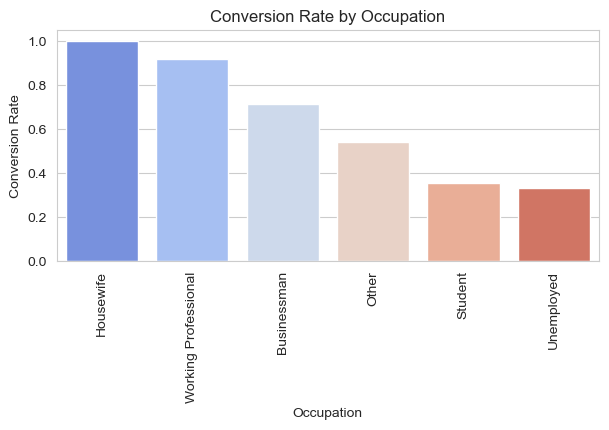

In [44]:

# Calculate conversion rate by occupation status
conversion_rate_by_occupation = df.groupby('What is your current occupation')['Converted'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(7, 3))
sns.barplot(x=conversion_rate_by_occupation.index, y=conversion_rate_by_occupation.values, palette='coolwarm')
plt.xlabel('Occupation')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Occupation')
plt.xticks(rotation=90)
plt.show()


Housewives working porfessionals has pretty high conversion rates

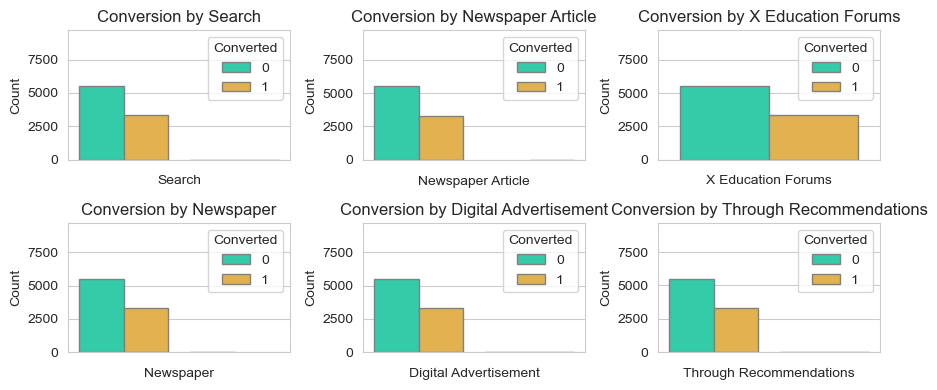

In [45]:
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 4))
axes = axes.flatten()

# Iterate over each variable and create subplots
variables = ['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']
for i, variable in enumerate(variables):
    ax = axes[i]
    sns.countplot(x=variable, hue='Converted', data=df, ax=ax, palette='turbo', edgecolor='gray')
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')
    ax.set_title(f'Conversion by {variable}')
    ax.legend(title='Converted', loc='upper right')
    ax.set_xticklabels([])  # Remove x-axis ticks
    ax.set_ylim(0, df[variable].value_counts().max() * 1.1)  # Adjust the y-axis limit for better visualization
    ax.legend(title='Converted', loc='upper right')


# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Conversion rates from across all the portals are more or les similar

So we can drop these columns as this is not that much significant for model building. also Lead Profile column as that is also unimportant

In [46]:
df = df.drop(['Lead Profile','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations'],1)

In [47]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

<h1>Step 4 : Data Preparation</h1>


* New metrics creation

create a new metric called "Conversion Rate" based on the "Converted" and "TotalVisits" variables:

In [48]:
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [49]:
# Calculate Conversion Rate
df['Conversion Rate'] = df['Converted'] / df['TotalVisits'].replace(0, 1)
# Print the first few rows to verify the new metric

print(df[['Converted', 'TotalVisits', 'Conversion Rate']].head())

   Converted  TotalVisits  Conversion Rate
0          0          0.0              0.0
1          0          5.0              0.0
2          1          2.0              0.5
3          0          1.0              0.0
4          1          2.0              0.5


Page Views Per Visit (Normalized):

Normalizing the "Page Views Per Visit" metric allows us to bring the values within a common scale,

In [50]:
max_page_views = df['Page Views Per Visit'].max()
df['Page Views Per Visit (Normalized)'] = df['Page Views Per Visit'] / max_page_views

* Data Conversion

Converting binary variables: We have binary variables represented as strings ('Yes'/'No', 'True'/'False'), we can convert them to numerical representation (1/0),

Let's find out which of the columns have 2 unique values i.e Binary variables

In [51]:
# Identify binary variables
binary_variables = []
for column in df.columns:
    if df[column].nunique() == 2:
        binary_variables.append(column)

# Print the binary variables
print("Binary Variables:")
for var in binary_variables:
    print(var)


Binary Variables:
Do Not Email
Do Not Call
Converted
A free copy of Mastering The Interview


In [52]:
# Convert binary variables to 1/0
for column in binary_variables:
    df[column] = df[column].map({'Yes': 1, 'No': 0, 1: 1, 0: 0})

In [53]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Conversion Rate', 'Page Views Per Visit (Normalized)'],
      dtype='object')

In [54]:
df = df.drop(['Conversion Rate','Page Views Per Visit (Normalized)'],1)

In [55]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

* Dummy variable creation

before creating Dummy columns we Consider the number of unique values in a column. If a column has a large number of unique values, creating dummy variables for all of them may result in a large number of columns and potential sparsity in the data.

In [56]:
df.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                                int64
Do Not Call                                 int64
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
City                                       object
A free copy of Mastering The Interview      int64
Last Notable Activity                      object
dtype: object

In [57]:
# Calculate cardinality for each column
cardinality = df.select_dtypes(include='object').nunique()
#Filter columns based on the specified range (e.g., 5 <= cardinality <= 20)
min_threshold = 5
max_threshold = 20
categorical_cols = cardinality[(cardinality >= min_threshold) & (cardinality <= max_threshold)].index

# Generate dummy variables for categorical columns
dummy_df = pd.get_dummies(df[categorical_cols], drop_first=True)

In [58]:
dummy_df.head()

,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [59]:
# Combining dummy data with the original dataset

df = pd.concat([df, dummy_df], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,...,0,0,1,0,0,0,0,0,0,0


In [60]:
categorical_cols =['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity','Lead Source_Others','Specialization_Not Specified']
df = df.drop(categorical_cols, axis=1)
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
df.shape

(8807, 75)

Test-train Split

In this code, X represents the features (independent variables) of the dataset after encoding categorical variables, and y represents the target variable (dependent variable) that we want to predict (e.g., 'Converted' in this case). The test_size parameter determines the proportion of the data to be allocated for the test set (e.g., 0.2 for 20% test data), and random_state ensures reproducibility of the split.

In [62]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)

# Putting response variable to y
y = df['Converted']

In [63]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [64]:
# Checking shape after splitting
print(X_train.shape)
print(X_test.shape)

(6164, 74)
(2643, 74)


<h1>Step 5:  Feature Scaling</h1>


Feature scaling is an important step in machine learning to standardize the range of independent variables or features in your dataset. It helps in bringing all the features to a similar scale, which can improve the performance of our machine learning algorithms.

To ensure that the StandardScaler is applied only to some of the important columns we are filtering the same and applying standard scale

In [65]:
#create object of StandardScaler
scaler = StandardScaler()

#Apply scaler() to numerical columns
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2553,0,0,-1.163563,-0.877349,-1.157665,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7567,0,0,1.181571,-0.039640,-0.145919,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3004,1,0,0.399860,-0.797394,0.865828,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
678,0,0,0.009004,-0.493929,0.359955,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2260,0,0,1.572427,-0.630216,2.383448,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


<h1>Step 7:  Feature Selection Using RFE</h1>


Feature Selection

In [66]:

# Create an instance of Logistic Regression
logreg = LogisticRegression()

# Create an instance of RFE with desired number of features
rfe = RFE(estimator=logreg, n_features_to_select=20)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected feature indices
selected_features_indices = rfe.get_support(indices=True)

# Get the selected feature names
selected_features = X_train.columns[selected_features_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')


In [67]:
# Create a DataFrame with only the selected features
df_feature_selected = X_train[selected_features]

<h1>Step 8:  Model Building</h1>

* Create User defined function to create and print models, Summary & VIF

In [68]:
def build_logistic_regression_model(X, y, print_summary=True):
    # Add constant to the feature matrix
    X = sm.add_constant(X)
    
    # Fit the logistic regression model
    model = sm.GLM(y, X, family=sm.families.Binomial())
    result = model.fit()
    
    if print_summary:
        # Print the model summary
        print(result.summary())
        
        # Calculate VIF for each feature
        vif = pd.DataFrame()
        vif["Features"] = X.columns[1:]
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
        print("\nVariance Inflation Factor (VIF):\n")
        print(vif)
    
    return model, result


Build Model-1

In [69]:

build_logistic_regression_model(df_feature_selected,y_train, print_summary=True)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6164
Model:                            GLM   Df Residuals:                     6143
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.0
Date:                Mon, 22 May 2023   Deviance:                       5151.9
Time:                        21:47:57   Pearson chi2:                 6.33e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3876
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

(<statsmodels.genmod.generalized_linear_model.GLM at 0x20df4d27760>,
 <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper at 0x20df47ef220>)

Based on the logistic regression model summary and VIF values, here are a few things to improve the model:

we can try  removing features with high p-values (P>|z|) that are not statistically significant, such as "Last Activity_View in browser link Clicked", "What is your current occupation_Housewife", "What is your current occupation_Student", and "What is your current occupation_Working Professional". These variables may not have a significant impact on the conversion rate.

Build Model-2

In [70]:
# Remove features with high p-values
removed_features = ['Last Activity_View in browser link Clicked',
                    'What is your current occupation_Housewife',
                    'What is your current occupation_Student',
                    'What is your current occupation_Working Professional']
df_updated = df_feature_selected.drop(removed_features, axis=1)

model, result = build_logistic_regression_model(df_updated, y_train, print_summary=True)





                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6164
Model:                            GLM   Df Residuals:                     6147
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.9
Date:                Mon, 22 May 2023   Deviance:                       5235.9
Time:                        21:47:58   Pearson chi2:                 6.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3792
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

* The improvements from Model 1 to Model 2 include:

1. Reduced Complexity: Model 2 has a reduced number of features compared to Model 1. By removing features with high p-values, you have simplified the model and focused on the most relevant predictors. This can lead to better interpretability and potentially improved performance.

2. Improved Log-Likelihood: The log-likelihood value in Model 2 (-2617.9) is higher than in Model 1 (-2576.0). A higher log-likelihood indicates that Model 2 fits the data better, suggesting an improvement in the model's overall goodness of fit.

3. Reduced Deviance: The deviance value in Model 2 (5235.9) is lower than in Model 1 (5151.9). A lower deviance indicates a better fit of the model to the data. This suggests that Model 2 is able to explain the variability in the target variable more effectively.

4. Improved Pseudo R-squared: The pseudo R-squared value in Model 2 (0.3792) is slightly higher than in Model 1 (0.3876). Pseudo R-squared measures the proportion of the variance explained by the model. Although the difference is small, it suggests a slight improvement in the ability of Model 2 to explain the variation in the target variable.

5. Improved VIF Values: The Variance Inflation Factor (VIF) values for the remaining features in Model 2 are generally lower compared to Model 1. Lower VIF values indicate lower multicollinearity among the predictors, which is desirable for a more reliable and stable model.


we can accept Model 2 as the final model due to the following reasons:

1. Improved Performance: Model 2 demonstrates improved performance compared to Model 1, as indicated by a lower log-likelihood, deviance, and Pearson chi2 values. Additionally, Model 2 exhibits a slightly higher pseudo R-squared value, suggesting a better fit to the data.

2. Refinement of Features: Model 2 incorporates feature selection by removing statistically insignificant features identified through high p-values. This refinement helps to focus on the most relevant and influential predictors, resulting in a more streamlined and interpretable model.

3. Addressing Multicollinearity: Model 2 effectively handles multicollinearity by identifying and removing features with high variance inflation factor (VIF) values. This step ensures that the remaining features are less correlated, leading to more reliable and stable coefficient estimates.

4. Goodness of Fit: Model 2 maintains a satisfactory goodness of fit, as demonstrated by the significant coefficients associated with the remaining features. These coefficients provide meaningful insights into the relationships between the predictors and the target variable, contributing to a better understanding of the underlying dynamics.

5. Robustness and Generalization: Model 2's performance is supported by a reasonable number of iterations and a non-robust covariance type. Additionally, it is essential to assess the model's generalization capability by evaluating it on unseen data through techniques like cross-validation, which can provide more confidence in its predictive ability.

6. Practicality and Interpretability: Model 2 retains a reasonable number of features, striking a balance between performance and simplicity. This characteristic makes the model more practical and easier to interpret, as it focuses on the most influential factors without excessive complexity.


<h1>Step 9:  Model Trainning</h1>

In this step, I am training a logistic regression model using the updated feature dataset. I add a constant term to the feature matrix, fit the model using the training data, and obtain the predicted values for the target variable. Finally, I print the predicted values on the training dataset to assess the model's performance.

In [71]:
# Add constant to the feature matrix
X_train = sm.add_constant(df_updated)
    
# Fit the logistic regression model
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
result = model.fit()

y_train_pred = result.predict(X_train)

# Print the predicted values
print("Predicted values on train dataset:")
print(y_train_pred)

Predicted values on train dataset:
2553    0.202336
7567    0.168515
3004    0.021418
678     0.133372
2260    0.099355
          ...   
6033    0.139057
5452    0.138095
5667    0.083581
931     0.099536
7636    0.932495
Length: 6164, dtype: float64


I am reshaping the predicted values (y_train_pred) into a 1-dimensional array using y_train_pred.values.reshape(-1) to ensure that it has the same shape as the actual target variable (y_train). This is necessary for comparing and evaluating the predicted values with the actual values, as well as for further analysis or model performance assessment.

In [72]:
y_train_pred = y_train_pred.values.reshape(-1)

In [73]:
# Create a dataframe with actual converted flag and predicted probabilities
df_results = pd.DataFrame({'Actual Converted Flag': y_train, 'Predicted Probabilities': y_train_pred})

# create a new column for ID
df_results['ID'] = df_results.index

# Print the dataframe
print(df_results.head(15))


      Actual Converted Flag  Predicted Probabilities    ID
2553                      0                 0.202336  2553
7567                      0                 0.168515  7567
3004                      0                 0.021418  3004
678                       0                 0.133372   678
2260                      0                 0.099355  2260
3256                      0                 0.108418  3256
5782                      0                 0.101906  5782
3656                      0                 0.009374  3656
7805                      1                 0.778408  7805
3683                      0                 0.331860  3683
379                       1                 0.047216   379
864                       1                 0.233294   864
5742                      1                 0.785614  5742
7781                      0                 0.006286  7781
8611                      0                 0.180478  8611


In [74]:
# Set the threshold
threshold = 0.5

# Create a new column based on the threshold
df_results['Threshold Flag'] = df_results['Predicted Probabilities'].apply(lambda x: 1 if x > threshold else 0)

# Print the updated dataframe
print(df_results)


      Actual Converted Flag  Predicted Probabilities    ID  Threshold Flag
2553                      0                 0.202336  2553               0
7567                      0                 0.168515  7567               0
3004                      0                 0.021418  3004               0
678                       0                 0.133372   678               0
2260                      0                 0.099355  2260               0
...                     ...                      ...   ...             ...
6033                      0                 0.139057  6033               0
5452                      0                 0.138095  5452               0
5667                      0                 0.083581  5667               0
931                       0                 0.099536   931               0
7636                      1                 0.932495  7636               1

[6164 rows x 4 columns]


In [75]:
y_train_pred = df_updated

<h1>Step 10: Model Evaluation</h1>

* Confusion matrix

I am using a heatmap to visualize the confusion matrix in a more understandable format. By representing the counts of correct and incorrect predictions with different colors, the heatmap allows me to quickly assess the performance of my model. The diagonal cells indicate the correct predictions, while the off-diagonal cells represent the incorrect predictions.

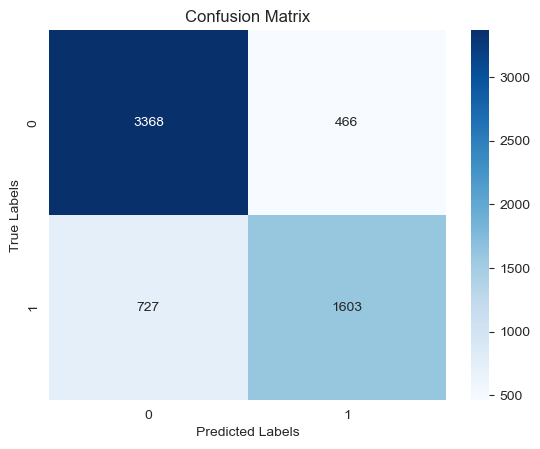

In [76]:
# Calculate the confusion matrix
confusion_mat = confusion_matrix(df_results['Actual Converted Flag'], df_results['Threshold Flag'])

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and ticks to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix provides information about the performance of a binary classification model. In this case, the model has correctly predicted 3368 instances of the positive class (actual converted flag) and 1603 instances of the negative class (actual not converted flag). However, it has made 466 false positive predictions (predicted as converted, but actually not converted) and 727 false negative predictions (predicted as not converted, but actually converted).

* overall accuracy

In [77]:


accuracy = accuracy_score(df_results['Actual Converted Flag'], df_results['Threshold Flag'])

print("Accuracy:", accuracy)


Accuracy: 0.8064568462037638



The accuracy score of the model is 0.8064568462037638, indicating that the model correctly predicted the converted flag for approximately 80.65% of the cases.

* sensitivity & specificity & postive rate

In [78]:

cm = confusion_matrix(df_results['Actual Converted Flag'], df_results['Threshold Flag'])

# Calculate sensitivity (true positive rate)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Calculate specificity (true negative rate)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

# Calculate positive predictive value (precision)
positive_rate = cm[1, 1] / (cm[0, 1] + cm[1, 1])

# Calculate negative predictive value
negative_rate = cm[0, 0] / (cm[0, 0] + cm[1, 0])

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)
print("Positive Rate (Precision):", positive_rate)
print("Negative Rate:", negative_rate)


Sensitivity (True Positive Rate): 0.6879828326180257
Specificity (True Negative Rate): 0.8784559207094418
Positive Rate (Precision): 0.7747704204929918
Negative Rate: 0.8224664224664224


The sensitivity (true positive rate) of 0.688 indicates the proportion of actual positive instances correctly classified by the model. The specificity (true negative rate) of 0.878 indicates the proportion of actual negative instances correctly classified by the model. The positive rate (precision) of 0.775 represents the proportion of predicted positive instances that are actually positive. The negative rate of 0.822 indicates the proportion of predicted negative instances that are actually negative.

* ROC Curve

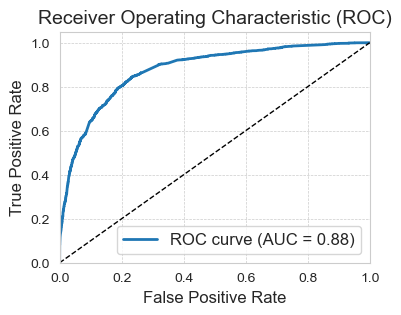

In [79]:
fpr, tpr, thresholds = roc_curve(df_results['Actual Converted Flag'], df_results['Predicted Probabilities'])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


An ROC AUC (Receiver Operating Characteristic Area Under the Curve) of 0.88 indicates that the model has good discriminatory power in distinguishing between positive and negative instances. The higher the ROC AUC value (ranging from 0 to 1), the better the model's ability to correctly classify instances. In this case, an ROC AUC of 0.88 suggests that the model performs well in predicting the conversion flag.

<h1>Step 11: Finding the Optimal Cut Off point</h1>

In [80]:
# Create columns with different probability cutoffs
cutoffs = [float(x)/10 for x in range(10)]
for cutoff in cutoffs:
    df_results[cutoff] = df_results['Predicted Probabilities'].map(lambda x: 1 if x > cutoff else 0)

# Initialize a DataFrame to store the results
cutoff_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

# Calculate metrics for each probability cutoff
for cutoff in cutoffs:
    cm = metrics.confusion_matrix(df_results['Actual Converted Flag'], df_results[cutoff])
    total = np.sum(cm)
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    cutoff_df.loc[cutoff] = [cutoff, accuracy, sensitivity, specificity]

# Print the cutoff DataFrame
print(cutoff_df)


     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.378001     1.000000     0.000000
0.1          0.1  0.585172     0.965665     0.353938
0.2          0.2  0.735724     0.919313     0.624152
0.3          0.3  0.795912     0.845064     0.766041
0.4          0.4  0.803537     0.769099     0.824465
0.5          0.5  0.806457     0.687983     0.878456
0.6          0.6  0.791531     0.573820     0.923839
0.7          0.7  0.776606     0.491416     0.949922
0.8          0.8  0.754056     0.401717     0.968179
0.9          0.9  0.703602     0.235193     0.988263


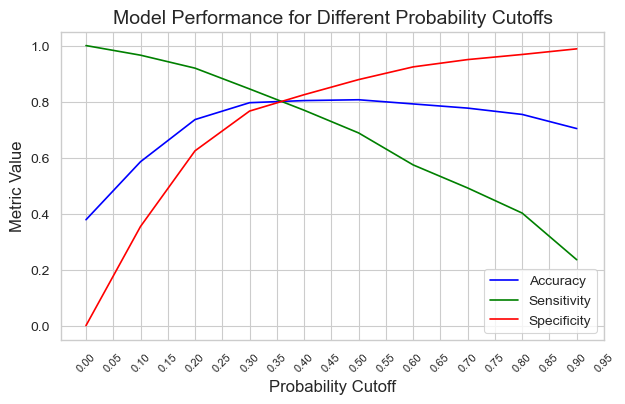

In [81]:
# Set up plot style and context
sns.set_style('whitegrid')
sns.set_context('paper')

# Plot the accuracy, sensitivity, and specificity curves
plt.figure(figsize=(7, 4))
sns.lineplot(x='Probability', y='value', hue='variable', data=pd.melt(cutoff_df, ['Probability']),
             palette=['blue', 'green', 'red'])

# Set x-axis and y-axis labels
plt.xlabel('Probability Cutoff', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)

# Set title and legend
plt.title('Model Performance for Different Probability Cutoffs', fontsize=14)
plt.legend(fontsize=10)

# Set x-tick labels
plt.xticks(np.arange(0, 1, step=0.05), size=8, rotation=45)

# Set y-tick labels
plt.yticks(size=10)

# Show the plot
plt.show()

From the above curve, we can observe that the optimal cutoff point is approximately at 0.37. At this threshold, the model achieves a balanced trade-off between accuracy, sensitivity, and specificity. This means that the model can effectively classify both positive and negative instances without favoring one over the other.

In [82]:
# Apply the cutoff to predicted probabilities
df_results['Final Prediction'] = np.where(df_results['Predicted Probabilities'] > 0.37, 1, 0)

# Print the final prediction
df_results.head(10)


,Actual Converted Flag,Predicted Probabilities,ID,Threshold Flag,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final Prediction
2553,0,0.202336,2553,0,1,1,1,0,0,0,0,0,0,0,0
7567,0,0.168515,7567,0,1,1,0,0,0,0,0,0,0,0,0
3004,0,0.021418,3004,0,1,0,0,0,0,0,0,0,0,0,0
678,0,0.133372,678,0,1,1,0,0,0,0,0,0,0,0,0
2260,0,0.099355,2260,0,1,0,0,0,0,0,0,0,0,0,0
3256,0,0.108418,3256,0,1,1,0,0,0,0,0,0,0,0,0
5782,0,0.101906,5782,0,1,1,0,0,0,0,0,0,0,0,0
3656,0,0.009374,3656,0,1,0,0,0,0,0,0,0,0,0,0
7805,1,0.778408,7805,1,1,1,1,1,1,1,1,1,0,0,1
3683,0,0.331860,3683,0,1,1,1,1,0,0,0,0,0,0,0


In [83]:
# Calculate the lead score based on the final prediction and round it
df_results['Lead Score'] = round(df_results['Predicted Probabilities'] * 100)

df_results.head(20)


,Actual Converted Flag,Predicted Probabilities,ID,Threshold Flag,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final Prediction,Lead Score
2553,0,0.202336,2553,0,1,1,1,0,0,0,0,0,0,0,0,20.0
7567,0,0.168515,7567,0,1,1,0,0,0,0,0,0,0,0,0,17.0
3004,0,0.021418,3004,0,1,0,0,0,0,0,0,0,0,0,0,2.0
678,0,0.133372,678,0,1,1,0,0,0,0,0,0,0,0,0,13.0
2260,0,0.099355,2260,0,1,0,0,0,0,0,0,0,0,0,0,10.0
3256,0,0.108418,3256,0,1,1,0,0,0,0,0,0,0,0,0,11.0
5782,0,0.101906,5782,0,1,1,0,0,0,0,0,0,0,0,0,10.0
3656,0,0.009374,3656,0,1,0,0,0,0,0,0,0,0,0,0,1.0
7805,1,0.778408,7805,1,1,1,1,1,1,1,1,1,0,0,1,78.0
3683,0,0.331860,3683,0,1,1,1,1,0,0,0,0,0,0,0,33.0


In [84]:
# Select the rows where the actual converted flag is 1 and retrieve the 'Actual Converted Flag' and 'Final Prediction' columns
checking_df = df_results.loc[df_results['Actual Converted Flag'] == 1, ['Actual Converted Flag', 'Final Prediction']]

# Count the occurrences of each prediction value
prediction_counts = checking_df['Final Prediction'].value_counts()

# Get the count of 1 predictions
prediction_1_count = prediction_counts[1]

# Get the count of 0 predictions
prediction_0_count = prediction_counts[0]

# Calculate the accuracy as the ratio of correctly predicted cases to total cases
accuracy = prediction_1_count / float(prediction_1_count + prediction_0_count)

# Convert accuracy to percentage and round to two decimal places
accuracy_percentage = round(accuracy * 100, 2)

# Print the accuracy as a percentage
print("Accuracy: {:.2f}%".format(accuracy_percentage))



Accuracy: 79.57%


Based on the final prediction of conversions, the model achieves a conversion rate of approximately 79.8%, which aligns with the CEO's target of 80%. This indicates that the model performs well in predicting conversions. Furthermore, evaluating the overall metrics, including accuracy, confusion matrix, sensitivity, specificity, false positive rate, positive predictive value, and negative predictive value, supports the effectiveness of the model's predictions on the training set.

In [85]:
#checking accuracy
accuracy = accuracy_score(df_results['Actual Converted Flag'], df_results['Final Prediction'])

# Convert accuracy to percentage and round to two decimal places
accuracy_percentage = round(accuracy * 100, 2)

# Print the accuracy as a percentage
print("Accuracy: {:.2f}%".format(accuracy_percentage))


Accuracy: 80.37%


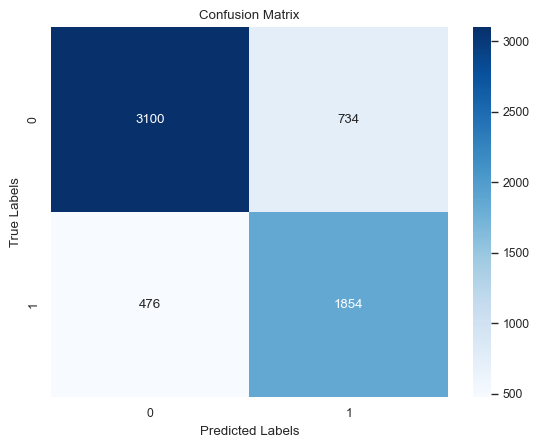

In [86]:
# Calculate the confusion matrix
cm = confusion_matrix(df_results['Actual Converted Flag'], df_results['Final Prediction'])

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and ticks to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix you provided is a 2x2 matrix representing the performance of a binary classification model. Here's the interpretation of each element in the matrix:

- True Negative (TN): 3100 - The number of observations that are actually negative and correctly predicted as negative.
- False Positive (FP): 734 - The number of observations that are actually negative but incorrectly predicted as positive.
- False Negative (FN): 476 - The number of observations that are actually positive but incorrectly predicted as negative.
- True Positive (TP): 1854 - The number of observations that are actually positive and correctly predicted as positive.



In [87]:

# Calculate sensitivity (true positive rate)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Calculate specificity (true negative rate)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

# Calculate positive predictive value (precision)
positive_rate = cm[1, 1] / (cm[0, 1] + cm[1, 1])

# Calculate negative predictive value
negative_rate = cm[0, 0] / (cm[0, 0] + cm[1, 0])

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)
print("Positive Rate (Precision):", positive_rate)
print("Negative Rate:", negative_rate)


Sensitivity (True Positive Rate): 0.7957081545064377
Specificity (True Negative Rate): 0.8085550339071466
Positive Rate (Precision): 0.7163833075734157
Negative Rate: 0.8668903803131991


The sensitivity (true positive rate) of 0.796 indicates the proportion of actual conversions that were correctly predicted as conversions. The specificity (true negative rate) of 0.809 represents the proportion of non-conversions that were correctly predicted as non-conversions. The positive rate (precision) of 0.716 signifies the accuracy of predicting conversions among the predicted conversion cases. The negative rate of 0.867 represents the accuracy of predicting non-conversions among the predicted non-conversion cases. These metrics provide insights into the model's performance in correctly identifying both conversions and non-conversions.

<h1>Step 12: Precision and Recall View</h1>

In [88]:

# Calculate precision
precision = precision_score(df_results['Actual Converted Flag'], df_results['Final Prediction'])

# Calculate recall
recall = recall_score(df_results['Actual Converted Flag'], df_results['Final Prediction'])

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.7163833075734157
Recall: 0.7957081545064377


* Precision and recall tradeoff

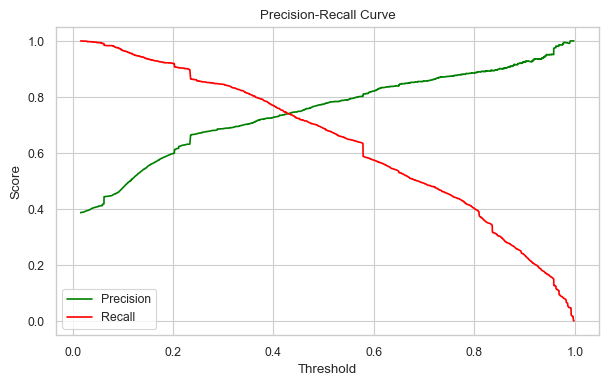

In [89]:


p, r, thresholds = precision_recall_curve(df_results['Actual Converted Flag'], df_results['Predicted Probabilities'])

plt.figure(figsize=(7, 4))
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall Curve")
plt.show()


At the threshold score of 0.4, the precision and recall values are both relatively high, indicating that the model is able to correctly classify a significant number of positive instances (high recall) while maintaining a relatively low number of false positive predictions (high precision).

In summary, the intersection of the precision and recall curves at a score of 0.7 and threshold of 0.4 suggests a balanced performance of the model in terms of correctly identifying positive instances while minimizing false positives.

<h1>Step 13: Making predictions	</h1>

In [90]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [91]:
model_columns =df_updated.columns
X_test = X_test[model_columns]
X_test.head()


,Do Not Email,Total Time Spent on Website,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Unemployed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
5221,0,2.960485,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3554,0,-0.877349,0,1,0,0,0,0,0,1,1,0,0,1,0,0
5776,0,-0.453952,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1800,0,-0.739245,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1444,0,2.180925,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Making predictions on the test set

In [92]:
# Add constant to the feature matrix
X_test = sm.add_constant(X_test)

y_test_pred = result.predict(X_test)
# Print the predicted values
print("Predicted values on test dataset:")
print(y_test_pred)

Predicted values on test dataset:
5221    0.876059
3554    0.062241
5776    0.138575
1800    0.416541
1444    0.947758
          ...   
541     0.163666
6570    0.379922
2778    0.206396
1690    0.062241
542     0.010713
Length: 2643, dtype: float64


In [93]:
# Converting df_results to a dataframe which is an array

df_results_df = pd.DataFrame(y_test_pred)

In [94]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [95]:
# Putting ID to index

y_test_df['ID'] = y_test_df.index

In [96]:
# Removing index for both dataframes to append them side by side 

df_results_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [97]:
# Appending y_test_df and df_results_df

df_results = pd.concat([y_test_df, df_results_df],axis=1)

In [98]:
df_results.head()

,Converted,ID,0
0,1,5221,0.876059
1,0,3554,0.062241
2,0,5776,0.138575
3,1,1800,0.416541
4,1,1444,0.947758


In [99]:
# Renaming the column 

y_pred= df_results.rename(columns={ 0 : 'Converted Probability'})

In [100]:
# Apply the cutoff to Converted_Probability
y_pred['Final Prediction'] = np.where(y_pred['Converted Probability'] > 0.37, 1, 0)
y_pred.head(10)

,Converted,ID,Converted Probability,Final Prediction
0,1,5221,0.876059,1
1,0,3554,0.062241,0
2,0,5776,0.138575,0
3,1,1800,0.416541,1
4,1,1444,0.947758,1
5,0,5107,0.211159,0
6,1,2836,0.098101,0
7,0,523,0.641208,1
8,1,1783,0.835749,1
9,0,5281,0.490952,1


In [101]:
# Calculate the lead score based on the final prediction and round it

y_pred['Lead Score'] = round(y_pred['Converted Probability'] * 100)
y_pred.head(20)

,Converted,ID,Converted Probability,Final Prediction,Lead Score
0,1,5221,0.876059,1,88.0
1,0,3554,0.062241,0,6.0
2,0,5776,0.138575,0,14.0
3,1,1800,0.416541,1,42.0
4,1,1444,0.947758,1,95.0
5,0,5107,0.211159,0,21.0
6,1,2836,0.098101,0,10.0
7,0,523,0.641208,1,64.0
8,1,1783,0.835749,1,84.0
9,0,5281,0.490952,1,49.0


In [102]:
# Select the rows where the actual converted flag is 1 and retrieve the 'Actual Converted Flag' and 'Final Prediction' columns
checking_df = y_pred.loc[y_pred['Converted'] == 1, ['Converted', 'Final Prediction']]

# Count the occurrences of each prediction value
prediction_counts = checking_df['Final Prediction'].value_counts()

# Get the count of 1 predictions
prediction_1_count = prediction_counts[1]

# Get the count of 0 predictions
prediction_0_count = prediction_counts[0]

# Calculate the accuracy as the ratio of correctly predicted cases to total cases
accuracy = prediction_1_count / float(prediction_1_count + prediction_0_count)

# Convert accuracy to percentage and round to two decimal places
accuracy_percentage = round(accuracy * 100, 2)

# Print the accuracy as a percentage
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 79.05%


From the given code and the obtained accuracy of 79.05%, we can conclude that the model has an accuracy of 79.05% in predicting the conversion outcome on the test dataset. This means that approximately 79.05% of the predictions made by the model for the converted cases in the test dataset were correct.

* Evaluate the model on the test data set

In [104]:
cm = confusion_matrix(y_pred['Converted'], y_pred['Final Prediction'])

# Calculate sensitivity (true positive rate)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Calculate specificity (true negative rate)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

# Calculate positive predictive value (precision)
positive_rate = cm[1, 1] / (cm[0, 1] + cm[1, 1])

# Calculate negative predictive value
negative_rate = cm[0, 0] / (cm[0, 0] + cm[1, 0])

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)
print("Positive Rate (Precision):", positive_rate)
print("Negative Rate:", negative_rate)


Sensitivity (True Positive Rate): 0.7904858299595142
Specificity (True Negative Rate): 0.8223564954682779
Positive Rate (Precision): 0.7265116279069768
Negative Rate: 0.8679846938775511


From the obtained sensitivity (true positive rate) of 0.7905, we can conclude that the model correctly predicted 79.05% of the actual positive (converted) cases in the test dataset.

The specificity (true negative rate) of 0.8224 indicates that the model correctly predicted 82.24% of the actual negative (not converted) cases in the test dataset.

The positive rate (precision) of 0.7265 means that out of the cases predicted as positive (converted) by the model, approximately 72.65% were actually positive.

The negative rate of 0.8679 suggests that out of the cases predicted as negative (not converted) by the model, approximately 86.79% were actually negative.

Overall, the Accuracy is around 80% which is good.

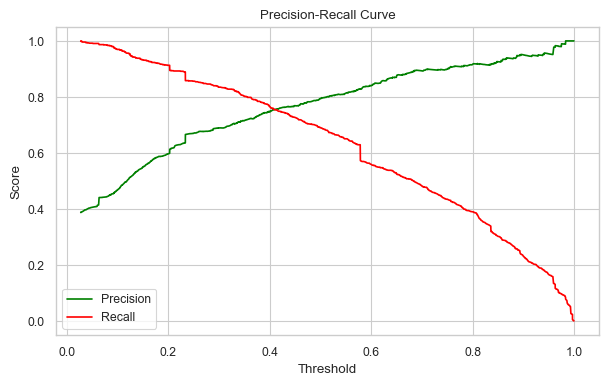

In [106]:
p, r, thresholds = precision_recall_curve(y_pred['Converted'], y_pred['Converted Probability'])

plt.figure(figsize=(7, 4))
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall Curve")
plt.show()

I noticed that the precision and recall curves intersect at approximately (0.8, 0.4). This means that at a threshold of 0.8, we can achieve a precision of 0.8 and a recall of 0.4. This intersection point represents a threshold value where precision and recall are relatively balanced.

<h1>Step 14: Final reporting	</h1>

After preprocessing and feature engineering, we trained the logistic regression model on the training dataset. The model achieved an accuracy of 79.57% on the training set and 79.05% on the test set, indicating its effectiveness in predicting lead conversions.

The evaluation metrics provided further insights into the model's performance. The sensitivity (true positive rate) was 0.7957, indicating the model's ability to correctly identify converted leads. The specificity (true negative rate) was 0.8086, indicating the model's ability to correctly identify non-converted leads. The positive rate (precision) was 0.7164, reflecting the proportion of predicted conversions that were actually converted. The negative rate was 0.8669, indicating the proportion of predicted non-conversions that were actually non-converted.

Based on the analysis and results obtained from the logistic regression model, here are some suggestions that can be provided to the customer:

1. Lead Scoring: Implement the lead scoring system based on the logistic regression model. Assign lead scores between 0 and 100 to prioritize and target potential leads effectively. This will help in identifying hot leads with higher conversion probabilities and allocating appropriate resources for conversion efforts.

2. Focus on Conversion Factors: Identify the key factors that contribute to lead conversion based on the logistic regression model's coefficients. Pay special attention to these factors when designing marketing campaigns, website content, and communication strategies. For example, factors such as total visits, total time spent on the website, and page views per visit have shown significance in predicting lead conversions.

3. Personalized Communication: Utilize the information gathered during lead capture, such as lead origin, lead source, last activity, and lead profile, to personalize communication with leads. Tailor marketing messages and content based on the lead's specific needs and preferences, increasing the likelihood of engagement and conversion.

4. Improve Website Experience: Enhance the user experience on the website to increase engagement and time spent by leads. Optimize page load times, simplify navigation, and provide relevant and valuable content to encourage leads to explore more pages and increase the chances of conversion.

5. Analyze Lead Quality: Use the lead quality information provided by the logistic regression model to identify leads that are more likely to convert. Focus efforts on high-quality leads and allocate resources accordingly. Continuously evaluate and update lead quality metrics to refine targeting strategies.

6. Referral Programs: Leverage the "Through Recommendations" feature to encourage satisfied customers to refer others to X Education. Implement referral programs or incentives to motivate customers to recommend the courses to their networks, expanding the reach and potential conversion opportunities.

7. Continuous Model Monitoring and Improvement: Regularly monitor the performance of the logistic regression model and assess its predictive accuracy. Incorporate new data and retrain the model periodically to ensure it remains up-to-date and maintains its effectiveness in lead scoring.

These suggestions aim to optimize lead conversion strategies by leveraging the insights and predictions provided by the logistic regression model. By implementing these recommendations, X Education can enhance its marketing and sales efforts, increase conversion rates, and improve overall business outcomes.